# Tarefa Data Set Grupo

### Imports necessários

In [3]:
import math
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from matplotlib.ticker import StrMethodFormatter



from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [5]:
df = pd.read_csv('music_genre.csv')


print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

### Leitura e Tratamento de Dados

Explicar o tratamento

In [6]:


df = df.dropna(axis=0)

# length of track name 
df['track_name_length'] = df['track_name'].apply(lambda x: len(x))

# check if remixz in track name
#df['isRemix'] = df['track_name'].apply(lambda x: 1 if 'remix' in x.lower() else 0)
#print(df['isRemix'].value_counts())


df = df.drop(['instance_id','obtained_date','artist_name','track_name'],axis=1)



lb_make = LabelEncoder()

# handle missing values on tempo
df['tempo'] = df['tempo'].apply(lambda x : 0 if x == '?' else float(x))
mean = df['tempo'].mean()

#Label encoding mode
df['mode'] = df['mode'].apply(lambda x : 1 if x == 'Major' else 0)
df['tempo'] = df['tempo'].apply(lambda x : mean if x == 0 else float(x))

#Join genre Rap and Hip-Hop
df['music_genre'] = df['music_genre'].apply(lambda x : 'Rap' if x == 'Hip-Hop' else x)

# handle missing values on duration
mean = df['duration_ms'].mean()
df['duration_ms'] = df['duration_ms'].apply(lambda x : mean if x == -1 else x)


#print(df.isna().sum())

#df['music_genre'] = lb_make.fit_transform(df['music_genre'])
df['key'] = lb_make.fit_transform(df['key'])

#df = df.drop(['key','music_genre'],axis=1)
#print(df['duration_ms'].value_counts())

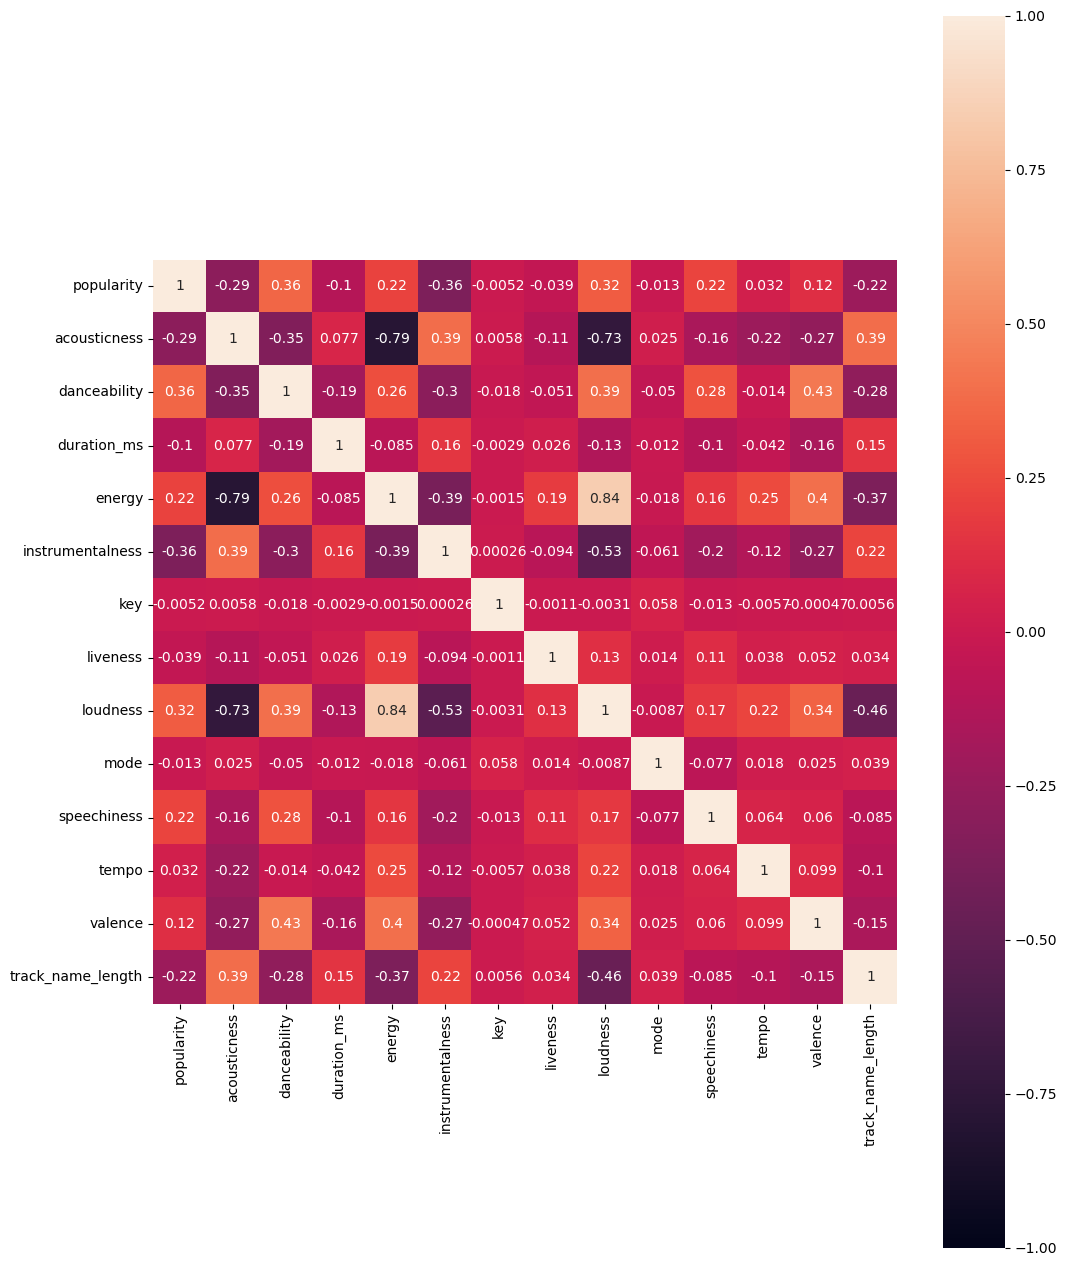

In [9]:

def correlation(df):
    corr_matrix = df.corr() 
    f, ax = plt.subplots(figsize=(12, 16))
    sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)
    plt.show()
    
correlation(df)

## Analise de Dados

## Modelos de Aprendizagem

In [13]:
x = df.drop(['music_genre'], axis=1)
y = df['music_genre'].to_frame()

### Decision Tree

In [15]:
def decisionTree(x,y):
    clf = DecisionTreeClassifier(random_state=2022)

    scores = cross_val_score(clf,x,y,cv=10)
    # scores = cross_val_score(clf, x, y,  cv=10)
    print(scores.mean())
    print(scores)

    X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2021)
    clf.fit(X_train,y_train)

    predictions = clf.predict(X_test)
    print(accuracy_score(y_test, predictions))
    #conf = confusion_matrix(y_test, predictions)
    #df_cm = pd.DataFrame(conf, range(9), range(9))
    ## plt.figure(figsize=(10,7))
    #sns.heatmap(df_cm, annot=True) # font size
    #plt.show()
    """
    fpr, tpr, _ = roc_curve(y_test, predictions)

    plt.clf()
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    """
    
decisionTree(x,y)



0.5430200000000001
[0.5522 0.5318 0.543  0.55   0.532  0.5516 0.5438 0.549  0.5314 0.5454]
0.54144


### Random Forest

In [16]:
def randomForest(x,y):
    clf = RandomForestClassifier(random_state=2022)

    scores = cross_val_score(clf,x,y.values.ravel(),cv=5)
    print(scores.mean())
    print(scores)

    X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2021)
    clf.fit(X_train,y_train.values.ravel())

    predictions = clf.predict(X_test)
    print(accuracy_score(y_test, predictions))
    
randomForest(x,y)

### Vetor Machine

In [ ]:
def vectorMachine(x,y):
    clf = SVC(random_state=2022)
    #scores = cross_val_score(clf,x,y.values.ravel(),cv=5)
    #print(scores.mean())
    #print(scores)

    X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2021)
    clf.fit(X_train,y_train.values.ravel())
    predictions = clf.predict(X_test)
    print(accuracy_score(y_test, predictions))

vectorMachine(x,y)

### Regressão Lógica

In [ ]:
def logisticRegression(x,y):
    clf = LogisticRegression(random_state=2022,solver='liblinear',max_iter=1000)
    scores = cross_val_score(clf,x,y.values.ravel(),cv=10)

    print(scores.mean())
    
    #X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2021)
    #clf.fit(X_train,y_train.values.ravel())
    #predictions = clf.predict(X_test)
    #print(predictions.shape)
    #cm = confusion_matrix(y_test, predictions)
    #print(cm)
#
    #cmd = ConfusionMatrixDisplay(cm, display_labels=df['music_genre'].unique())
    #cmd.plot()
    #plt.show()
    
logisticRegression(x,y)